## Get my Playlist

In [1]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Load environment variables from .env file
load_dotenv()

# Get Spotify API credentials from environment variables
SPOTIPY_CLIENT_ID = os.getenv('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET = os.getenv('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.getenv('SPOTIPY_REDIRECT_URI')
SAIF_SONGS_ID = os.getenv('SAIF_SONGS_ID')

# All available Spotify scopes
SCOPES = [
    'ugc-image-upload', 'user-read-playback-state', 'user-modify-playback-state', 
    'user-read-currently-playing', 'app-remote-control', 'streaming', 
    'playlist-read-private', 'playlist-read-collaborative', 'playlist-modify-private', 
    'playlist-modify-public', 'user-follow-modify', 'user-follow-read', 
    'user-read-playback-position', 'user-top-read', 'user-read-recently-played', 
    'user-library-modify', 'user-library-read', 'user-read-email', 'user-read-private'
]

# Join all scopes into a space-separated string
SCOPE = ' '.join(SCOPES)

# Set up SpotifyOAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET,
                                               redirect_uri=SPOTIPY_REDIRECT_URI,
                                               scope=SCOPE))

# Main execution
playlist_name = "Saif Songs"
results = sp.playlist_tracks(SAIF_SONGS_ID)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

# Extract song and artist information
songs = []
for track in tracks:
    track_info = track['track']
    song_name = track_info['name']
    artists = ', '.join([artist['name'] for artist in track_info['artists']])
    songs.append(f"{song_name} by {artists}")

print(f"Songs in the playlist '{playlist_name}':")
for i, song in enumerate(songs, 1):
    print(f"{i}. {song}")

Songs in the playlist 'Saif Songs':
1. Layla by Cairokee
2. Atgah Wahed by Angham
3. Hateer Min Tany by Hamza Namira
4. Mine d'or by KALY
5. Origine by KALY
6. Menteuse by KALY, Dadju
7. Doucement by Ronisia
8. Problème by Ronisia, CKay
9. Désolée by Ronisia
10. Solitude by Ronisia
11. Copines by Aya Nakamura
12. Comportement by Aya Nakamura
13. Plus Jamais (feat. Stormzy) by Aya Nakamura, Stormzy
14. J'ai mal by Aya Nakamura
15. Haut niveau by Aya Nakamura
16. Definitivamente by Daddy Yankee, Sech
17. I Don't Want You Back by AJ Mitchell
18. El Campeón by El Kimiko y Yordy, Michel Boutic, EL YORDY DK
19. I Want It That Way by Backstreet Boys
20. It's Gonna Be Me by *NSYNC
21. Tearin' up My Heart - Radio Edit by *NSYNC
22. Bye Bye Bye - From Deadpool and Wolverine Soundtrack by *NSYNC
23. Leave Some Day by Kevo Muney
24. J'avoue, j'avoue by SenSey', Hiro
25. Django by Dadju, Franglish
26. Donna Imma by Franglish
27. Peur d'aimer by Franglish
28. Sans moi by Franglish, Aya Nakamura
29. 

## Get the Genres from my Playlist

In [3]:
from collections import defaultdict

def get_artist_genres(artist_id):
    artist_info = sp.artist(artist_id)
    return artist_info['genres']

def classify_genres(tracks):
    genre_classification = defaultdict(list)
    
    for track in tracks:
        track_info = track['track']
        song_name = track_info['name']
        artists = track_info['artists']
        
        # Get genres for all artists of the track
        track_genres = set()
        for artist in artists:
            artist_genres = get_artist_genres(artist['id'])
            track_genres.update(artist_genres)
        
        # If no genres found, classify as 'Unknown'
        if not track_genres:
            genre_classification['Unknown'].append(song_name)
        else:
            # Classify track under each of its genres
            for genre in track_genres:
                genre_classification[genre].append(song_name)
    
    return genre_classification

def print_genre_classification(genre_classification):
    for genre, songs in genre_classification.items():
        print(f"\n{genre.capitalize()}:")
        for song in songs:
            print(f"- {song}")

In [4]:
print(f"Classifying songs from the playlist '{playlist_name}' into genres...")
genre_classification = classify_genres(tracks)
print_genre_classification(genre_classification)

Classifying songs from the playlist 'Saif Songs' into genres...

Egyptian pop:
- Layla
- Atgah Wahed
- Hateer Min Tany
- La Ta3leeq
- Hobak Enta
- Lolak Habiby
- Ya 3araf X Favor - Coke Studio Africa 2023
- Ya 3araf

Egyptian rock:
- Layla

Egyptian alternative:
- Layla
- Hateer Min Tany

Arab alternative:
- Layla

Arab pop:
- Atgah Wahed
- Hateer Min Tany
- Zidini
- La Ta3leeq
- ندمانة
- Halef 3al Hob
- Gana (feat. Hatim Ammor)
- لا جوزاديرا (feat. Marc Anthony & Gente de Zona) - Arabic Version
- Hobak Enta
- Lolak Habiby
- Ya 3araf X Favor - Coke Studio Africa 2023
- Ya 3araf
- Coke Studio Morocco
- Ah Ya Liam

Classic arab pop:
- Atgah Wahed
- C'est La Vie
- Aïcha

Unknown:
- Mine d'or
- Origine
- Aicha
- Callin' U
- Addictions
- A New Hope
- I Want It That Way
- Don't Say Love
- Nsiti
- The Day Before Goodbye
- Empty
- Bad Habits
- Harder To Breathe
- Letdown
- Kryptonite (Reloaded)
- Outrunning.
- El Anciano y el Niño
- Menak Wla Meni
- Low
- Still Breathing
- Mahma Kan
- Сердце н

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from collections import Counter

def create_genre_bar_chart(genre_classification):
    genres = list(genre_classification.keys())
    song_counts = [len(songs) for songs in genre_classification.values()]
    
    fig = go.Figure(data=[go.Bar(x=genres, y=song_counts)])
    fig.update_layout(title='Number of Songs per Genre',
                      xaxis_title='Genre',
                      yaxis_title='Number of Songs')
    fig.show()

def create_genre_pie_chart(genre_classification):
    genres = list(genre_classification.keys())
    song_counts = [len(songs) for songs in genre_classification.values()]
    
    fig = go.Figure(data=[go.Pie(labels=genres, values=song_counts)])
    fig.update_layout(title='Distribution of Songs across Genres')
    fig.show()

def create_genre_network(genre_classification):
    # Create a graph
    G = nx.Graph()
    
    # Add nodes (genres)
    for genre in genre_classification.keys():
        G.add_node(genre)
    
    # Add edges (connections between genres that share songs)
    for genre1 in genre_classification.keys():
        for genre2 in genre_classification.keys():
            if genre1 != genre2:
                shared_songs = set(genre_classification[genre1]) & set(genre_classification[genre2])
                if shared_songs:
                    G.add_edge(genre1, genre2, weight=len(shared_songs))
    
    # Get position layout for nodes
    pos = nx.spring_layout(G)
    
    # Create edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
    
    # Create nodes trace
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    
    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', hoverinfo='text', 
                            marker=dict(size=10, line_width=2),
                            text=list(G.nodes()), textposition="top center")
    
    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(showlegend=False, hovermode='closest',
                                     margin=dict(b=0,l=0,r=0,t=0),
                                     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    
    fig.update_layout(title='Genre Relationship Network')
    fig.show()

def create_song_heatmap(genre_classification):
    # Flatten the genre classification
    data = [(song, genre) for genre, songs in genre_classification.items() for song in songs]
    df = pd.DataFrame(data, columns=['Song', 'Genre'])
    
    # Count occurrences of each song in each genre
    pivot_df = df.pivot_table(index='Song', columns='Genre', aggfunc=len, fill_value=0)
    
    fig = px.imshow(pivot_df, aspect="auto", labels=dict(color="Genre Count"))
    fig.update_layout(title='Song-Genre Heatmap',
                      xaxis_title='Genre',
                      yaxis_title='Song')
    fig.show()

def create_word_cloud(genre_classification):
    # Count all words in song titles
    word_count = Counter()
    for songs in genre_classification.values():
        for song in songs:
            words = song.lower().split()
            word_count.update(words)
    
    # Create a dataframe from word counts
    df = pd.DataFrame.from_dict(word_count, orient='index').reset_index()
    df.columns = ['word', 'count']
    df = df.sort_values('count', ascending=False)
    
    fig = px.treemap(df, path=['word'], values='count')
    fig.update_layout(title='Word Frequency in Song Titles')
    fig.show()

In [6]:
create_genre_bar_chart(genre_classification)
create_genre_pie_chart(genre_classification)
create_genre_network(genre_classification)
create_song_heatmap(genre_classification)
create_word_cloud(genre_classification)

In [7]:
def classify_song_to_single_genre(genre_classification):
    song_genre = {}
    for genre, songs in genre_classification.items():
        for song in songs:
            if song not in song_genre:
                song_genre[song] = genre
            else:
                # If the song is already classified, choose the more specific genre
                # (assuming that the genre with fewer songs is more specific)
                if len(genre_classification[genre]) < len(genre_classification[song_genre[song]]):
                    song_genre[song] = genre
    return song_genre

def create_song_genre_bar_chart(genre_classification):
    song_genre = classify_song_to_single_genre(genre_classification)
    
    # Count the number of songs in each genre
    genre_counts = Counter(song_genre.values())
    
    # Sort genres by count
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genres, counts = zip(*sorted_genres)
    
    # Create the bar chart
    fig = go.Figure(go.Bar(
        y=genres,
        x=counts,
        orientation='h'
    ))
    
    fig.update_layout(
        title='Number of Songs per Genre (Single Genre Classification)',
        xaxis_title='Number of Songs',
        yaxis_title='Genre',
        height=max(600, len(genres) * 20),  # Adjust height based on number of genres
        yaxis={'categoryorder':'total ascending'}
    )
    
    fig.show()

In [8]:
create_song_genre_bar_chart(genre_classification)

## Get rid of Unknown genres

In [11]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from collections import Counter

def create_song_genre_bar_chart(genre_classification, sp):
    # Flatten the genre classification and count genres for each song
    song_genres = {}
    for genre, songs in genre_classification.items():
        for song in songs:
            if song not in song_genres:
                song_genres[song] = Counter()
            song_genres[song][genre] += 1
    
    # Determine the most prevalent genre for each song
    songs_with_primary_genre = []
    for song, genre_counter in song_genres.items():
        primary_genre = genre_counter.most_common(1)[0][0]
        
        # If the primary genre is 'Unknown', find the next best genre
        if primary_genre == 'Unknown':
            # Get the track's artists
            results = sp.search(q=song, type='track', limit=1)
            if results['tracks']['items']:
                track = results['tracks']['items'][0]
                artist_id = track['artists'][0]['id']
                
                # Get the artist's genres
                artist_info = sp.artist(artist_id)
                artist_genres = artist_info['genres']
                
                if artist_genres:
                    primary_genre = artist_genres[0]
                else:
                    # If still no genre, get related artists and use their genres
                    related_artists = sp.artist_related_artists(artist_id)['artists']
                    for related_artist in related_artists:
                        if related_artist['genres']:
                            primary_genre = related_artist['genres'][0]
                            break
                    
                    # If still no genre, use a generic category
                    if primary_genre == 'Unknown':
                        primary_genre = 'Other'
        
        songs_with_primary_genre.append((song, primary_genre))
    
    # Sort the list by genre and then by song name
    songs_with_primary_genre.sort(key=lambda x: (x[1], x[0]))
    
    # Create lists for plotting
    songs, genres = zip(*songs_with_primary_genre)
    
    # Create the horizontal bar chart
    fig = go.Figure(go.Bar(
        y=songs,
        x=[1] * len(songs),  # Each bar has a width of 1
        orientation='h',
        marker=dict(
            color=[hash(genre) % 256 for genre in genres],  # Assign colors based on genre
            colorscale='Viridis'  # You can change this to any colorscale you prefer
        ),
        text=genres,
        textposition='inside',
        insidetextanchor='middle',
        insidetextfont=dict(color='white')
    ))
    
    fig.update_layout(
        title='Primary Genre for Each Song',
        xaxis_title='',
        yaxis_title='Songs',
        xaxis=dict(showticklabels=False),  # Hide x-axis labels as they're not meaningful
        height=max(600, len(songs) * 20),  # Adjust height based on number of songs
        margin=dict(l=200)  # Increase left margin to ensure song names are visible
    )
    
    fig.show()

In [12]:
create_song_genre_bar_chart(genre_classification, sp)

In [13]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from collections import Counter

def create_genre_histogram(genre_classification, sp):
    # First, determine the primary genre for each song (reusing logic from create_song_genre_bar_chart)
    song_primary_genres = []
    for genre, songs in genre_classification.items():
        for song in songs:
            if genre != 'Unknown':
                song_primary_genres.append(genre)
            else:
                # If the genre is 'Unknown', find the next best genre (simplified version)
                results = sp.search(q=song, type='track', limit=1)
                if results['tracks']['items']:
                    track = results['tracks']['items'][0]
                    artist_id = track['artists'][0]['id']
                    artist_info = sp.artist(artist_id)
                    artist_genres = artist_info['genres']
                    if artist_genres:
                        song_primary_genres.append(artist_genres[0])
                    else:
                        song_primary_genres.append('Other')
                else:
                    song_primary_genres.append('Other')
    
    # Count the occurrences of each genre
    genre_counts = Counter(song_primary_genres)
    
    # Sort genres by count (descending)
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genres, counts = zip(*sorted_genres)
    
    # Create the histogram
    fig = go.Figure(data=[go.Bar(
        x=genres,
        y=counts,
        text=counts,
        textposition='auto',
    )])
    
    fig.update_layout(
        title='Distribution of Songs Across Genres',
        xaxis_title='Genres',
        yaxis_title='Number of Songs',
        xaxis_tickangle=-45,
        bargap=0.1,
        height=600,
        margin=dict(b=100)  # Increase bottom margin to fit genre labels
    )
    
    fig.show()


In [14]:
create_genre_histogram(genre_classification, sp)

## Get similar genres and group them together

In [15]:
from gensim.models import KeyedVectors
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
import re

# Load pre-trained word vectors
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

def preprocess_genre(genre):
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', genre.lower())
    return words

def get_genre_embedding(genre):
    words = preprocess_genre(genre)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(300)  # Return zero vector if no words are found

def cluster_genres(genres, n_clusters=10):
    # Get embeddings for each genre
    genre_embeddings = [get_genre_embedding(genre) for genre in genres]
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(genre_embeddings)
    
    # Group genres by cluster
    clustered_genres = defaultdict(list)
    for genre, label in zip(genres, cluster_labels):
        clustered_genres[label].append(genre)
    
    # Name each cluster based on the most common words in its genres
    named_clusters = {}
    for label, cluster_genres in clustered_genres.items():
        all_words = [word for genre in cluster_genres for word in preprocess_genre(genre)]
        word_counts = Counter(all_words)
        cluster_name = ' '.join([word for word, _ in word_counts.most_common(3)])
        named_clusters[cluster_name] = cluster_genres
    
    return named_clusters

def create_clustered_genre_histogram(genre_classification, sp):
    # First, determine the primary genre for each song (reusing logic from previous function)
    song_primary_genres = []
    for genre, songs in genre_classification.items():
        for song in songs:
            if genre != 'Unknown':
                song_primary_genres.append(genre)
            else:
                # If the genre is 'Unknown', find the next best genre (simplified version)
                results = sp.search(q=song, type='track', limit=1)
                if results['tracks']['items']:
                    track = results['tracks']['items'][0]
                    artist_id = track['artists'][0]['id']
                    artist_info = sp.artist(artist_id)
                    artist_genres = artist_info['genres']
                    if artist_genres:
                        song_primary_genres.append(artist_genres[0])
                    else:
                        continue  # Skip if no genre is found
                else:
                    continue  # Skip if track is not found
    
    # Cluster the genres
    clustered_genres = cluster_genres(set(song_primary_genres))
    
    # Count songs in each cluster
    cluster_counts = Counter()
    for song_genre in song_primary_genres:
        for cluster_name, genres in clustered_genres.items():
            if song_genre in genres:
                cluster_counts[cluster_name] += 1
                break
    
    # Sort clusters by count
    sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)
    cluster_names, counts = zip(*sorted_clusters)
    
    # Create the histogram
    fig = go.Figure(data=[go.Bar(
        x=cluster_names,
        y=counts,
        text=counts,
        textposition='auto',
        marker_color='rgb(158,202,225)',
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5,
        opacity=0.6
    )])
    
    fig.update_layout(
        title={
            'text': 'Distribution of Songs Across Clustered Genres',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Genre Clusters',
        yaxis_title='Number of Songs',
        xaxis_tickangle=-45,
        bargap=0.2,
        height=600,
        margin=dict(b=100, l=50, r=50, t=100),
        plot_bgcolor='rgb(243, 243, 243)',
        paper_bgcolor='rgb(243, 243, 243)',
        font=dict(family="Arial", size=12, color="rgb(68, 68, 68)")
    )
    
    # Add hover information
    hovertext = []
    for cluster_name in cluster_names:
        genres_in_cluster = '<br>'.join(clustered_genres[cluster_name])
        hovertext.append(f'Cluster: {cluster_name}<br>Genres:<br>{genres_in_cluster}')
    
    fig.update_traces(hovertext=hovertext, hoverinfo='text')
    
    fig.show()


In [16]:
create_clustered_genre_histogram(genre_classification, sp)

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import pandas as pd
import seaborn as sns


def get_audio_features(track_id):
    """Get audio features for a track from Spotify API"""
    return sp.audio_features(track_id)[0]

def download_preview(preview_url):
    """Download the audio preview"""
    response = requests.get(preview_url)
    return io.BytesIO(response.content)

def visualize_waveform(y, sr):
    """Visualize the audio waveform"""
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Audio Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def visualize_spectrogram(y, sr):
    """Visualize the spectrogram"""
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

def visualize_audio_features(features):
    """Visualize audio features"""
    feature_names = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
    feature_values = [features[name] for name in feature_names]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_names, y=feature_values)
    plt.title('Audio Features')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_audio(track_id, preview_url, visualize=True):
    """Analyze audio and create visualizations"""
    # Get audio features from Spotify API
    features = get_audio_features(track_id)

    # Download and load audio preview
    audio_file = download_preview(preview_url)
    y, sr = librosa.load(audio_file)

    if visualize:
        # Visualize waveform and spectrogram
        visualize_waveform(y, sr)
        visualize_spectrogram(y, sr)

        # Visualize audio features
        visualize_audio_features(features)

    # Print statistical analysis
    print(f"Tempo: {features['tempo']} BPM")
    print(f"Loudness: {features['loudness']} dB")
    print(f"Key: {features['key']}")
    print(f"Mode: {'Major' if features['mode'] == 1 else 'Minor'}")
    print(f"Time Signature: {features['time_signature']}/4")

    # Calculate and print additional statistics
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    pitch_class_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    dominant_pitch = pitch_class_names[np.argmax(chroma_mean)]
    
    print(f"\nDominant Pitch Class: {dominant_pitch}")
    print(f"Mean Chroma Energy: {np.mean(chroma_mean):.4f}")
    print(f"Std Chroma Energy: {np.std(chroma_mean):.4f}")

    if visualize:
        # Visualize chroma features
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
        plt.colorbar()
        plt.title('Chroma Features')
        plt.tight_layout()
        plt.show()
    
    return [features, dominant_pitch, np.mean(chroma_mean), np.std(chroma_mean)]

Analyzing: Layla by Cairokee


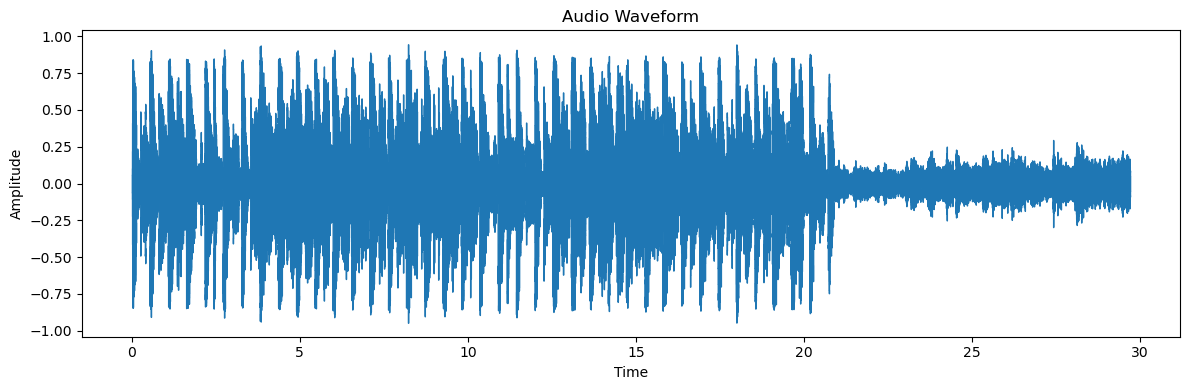

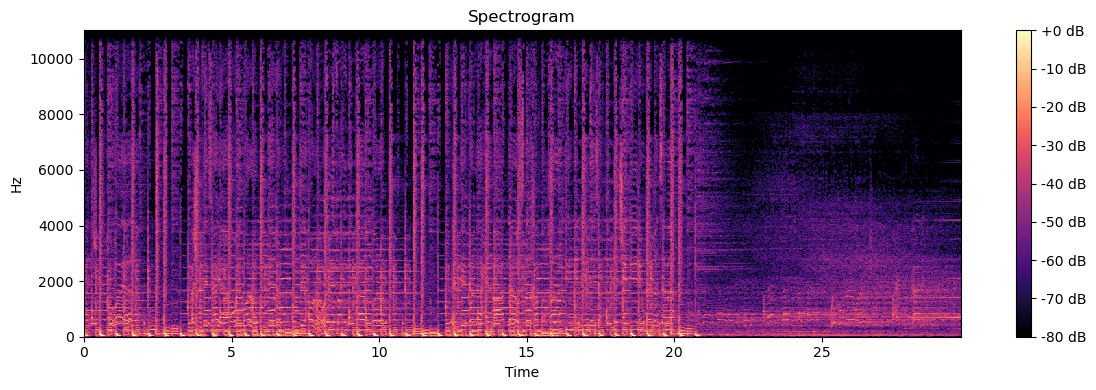

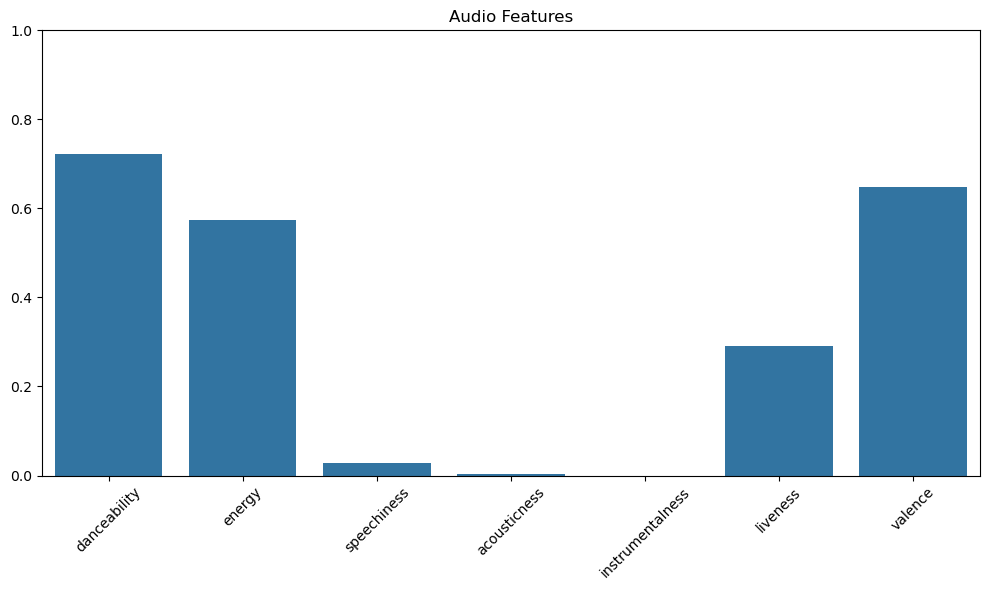

Tempo: 110.021 BPM
Loudness: -9.159 dB
Key: 5
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: G
Mean Chroma Energy: 0.4036
Std Chroma Energy: 0.0952


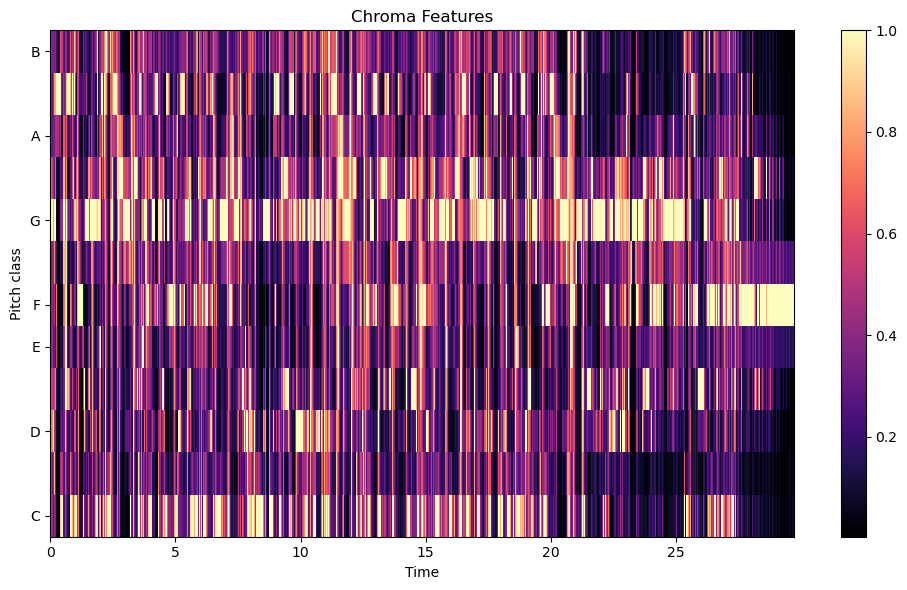

In [6]:
# Get the first track from the user's "Saif Songs" playlist
playlist_name = "Saif Songs"
playlists = sp.current_user_playlists()
playlist = next((pl for pl in playlists['items'] if pl['name'] == playlist_name), None)

if playlist:
    tracks = sp.playlist_tracks(playlist['id'])
    if tracks['items']:
        track = tracks['items'][0]['track']
        track_id = track['id']
        preview_url = track['preview_url']
        
        if preview_url:
            print(f"Analyzing: {track['name']} by {track['artists'][0]['name']}")
            analyze_audio(track_id, preview_url)
        else:
            print("No preview available for this track.")
    else:
        print("No tracks found in the playlist.")
else:
    print(f"Playlist '{playlist_name}' not found.")

In [8]:
tracks = sp.playlist_tracks(playlist['id'])
if tracks['items']:
    for i, _ in enumerate(tracks['items']):
        track = tracks['items'][i]['track']
        track_id = track['id']
        preview_url = track['preview_url']
        
        if preview_url:
            print(f"Analyzing: {track['name']} by {track['artists'][0]['name']}")
            analyze_audio(track_id, preview_url, visualize=False)
        else:
            print("No preview available for this track.")
        print("----------------------------------------")
else:
    print("No tracks found in the playlist.")

Analyzing: Layla by Cairokee
Tempo: 110.021 BPM
Loudness: -9.159 dB
Key: 5
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: G
Mean Chroma Energy: 0.4036
Std Chroma Energy: 0.0952
----------------------------------------
Analyzing: Atgah Wahed by Angham
Tempo: 109.944 BPM
Loudness: -8.792 dB
Key: 5
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: G
Mean Chroma Energy: 0.2786
Std Chroma Energy: 0.1074
----------------------------------------
Analyzing: Hateer Min Tany by Hamza Namira
Tempo: 119.998 BPM
Loudness: -6.554 dB
Key: 8
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: A#
Mean Chroma Energy: 0.2579
Std Chroma Energy: 0.1056
----------------------------------------
Analyzing: Mine d'or by KALY
Tempo: 140.034 BPM
Loudness: -6.288 dB
Key: 2
Mode: Minor
Time Signature: 4/4

Dominant Pitch Class: G
Mean Chroma Energy: 0.3705
Std Chroma Energy: 0.0435
----------------------------------------
Analyzing: Origine by KALY
Tempo: 122.443 BPM
Loudness: -7.598 dB
Key: 4
Mode